In [1]:
import os
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from matplotlib.dates import date2num
import datetime
import time
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob

In [2]:
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

def granule_date(granule):
    return [granule[5:13], granule[21:29]]

def lines_from_granule(granule_list):
    lines = []
    
    granule_list.sort(key=granule_date)
    
    for i, granule in enumerate(granule_list):
        lines.append([(year_fraction(datetime.datetime.strptime(granule[5:13], '%Y%m%d')), i),
                      (year_fraction(datetime.datetime.strptime(granule[21:29], '%Y%m%d')), i)])
    return lines

def remove_dups(glob_list):
    new_list = []
    dates_list = []
    for i, path in enumerate(glob_list):
        granule = os.path.basename(path)
        dates = f'{granule[5:13]}_{granule[21:29]}'
        if not dates in dates_list:
            new_list.append(granule)
            dates_list.append(dates)
    return new_list

def count_connections(glob_list):
    count_dict = {}
    for i, path in enumerate(glob_list):
        granule = os.path.basename(path)
        start = granule[5:20]
        stop = granule[21:36]
        if not start in count_dict.keys():
            count_dict[start] = 0
        if not stop in count_dict.keys():
            count_dict[stop] = 0
        count_dict[start] += 1
        count_dict[stop] += 1
    return count_dict

In [3]:
data_dir = '/mnt/d/indennt'

In [4]:
asc_paths_signal = glob(f'{data_dir}/hyp3/AT151/*/*/*')
asc_paths_noise = glob(f'{data_dir}/hyp3/AT151/*/*/*P012*')
des_paths_signal = glob(f'{data_dir}/hyp3/DT56/*/*/*')
des_paths_noise = glob(f'{data_dir}/hyp3/DT56/*/*/*P012*')
asc_paths_test = glob(f'{data_dir}/hyp3_app/AT137/*/*')

In [5]:
np.mean(list(count_connections(asc_paths_signal).values())+list(count_connections(des_paths_signal).values()))

6.939632545931759

In [6]:
asc_signal_lines = lines_from_granule(remove_dups(asc_paths_signal))
asc_noise_lines = lines_from_granule(remove_dups(asc_paths_noise))
des_signal_lines = lines_from_granule(remove_dups(des_paths_signal))
des_noise_lines = lines_from_granule(remove_dups(des_paths_noise))
asc_test_lines = lines_from_granule(remove_dups(asc_paths_test))

In [26]:
asc_signal_lc = mc.LineCollection(asc_signal_lines, linewidths=1.5, color='indianred')
des_signal_lc = mc.LineCollection(des_signal_lines, linewidths=1.5, color='darkturquoise')
asc_noise_lc = mc.LineCollection(asc_noise_lines, linewidths=1.5, color='indianred')
des_noise_lc = mc.LineCollection(des_noise_lines, linewidths=1.5, color='darkturquoise')
asc_test_lc = mc.LineCollection(asc_test_lines, linewidths=1.5, color='indianred')

/tmp/ipykernel_526/4129091609.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


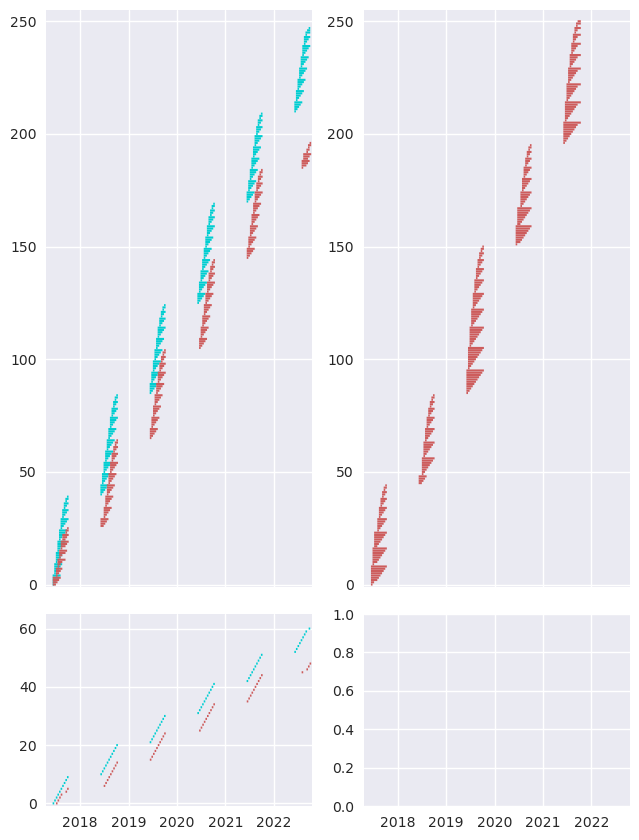

In [27]:
plt.style.use('seaborn')
f, ax = plt.subplots(2, 2, figsize=(6.5, 8.5), height_ratios=[3, 1], sharex=True)
ax[0][0].add_collection(des_signal_lc)
ax[0][0].add_collection(asc_signal_lc)
ax[1][0].add_collection(des_noise_lc)
ax[1][0].add_collection(asc_noise_lc)

ax[0][1].add_collection(asc_test_lc)

asc_signal_lc.set_snap(False)
des_signal_lc.set_snap(False)
asc_noise_lc.set_snap(False)
des_noise_lc.set_snap(False)
asc_test_lc.set_snap(False)

ax[0][0].set_xlim(2017.3, 2022.8)
ax[0][0].set_ylim(-1, 255)
ax[1][0].set_xlim(2017.3, 2022.8)
ax[1][0].set_ylim(-1, 65)

ax[0][1].set_xlim(2017.3, 2022.8)
ax[0][1].set_ylim(-1, 255)

plt.tight_layout()

#plt.savefig('../../figs/tbline_all.png', dpi=300)